In [1]:
from collections import defaultdict
import numpy as np, os
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from libs import noisify, noisy_evaluate, read_jira

## Questions
+ How much sensitive are classifiers to noisy evaluation labels? Hyparam vs accuracy
+ Apart from noise level (and generally noise confusion matrix), what other factors play a role?
+ How much does hyparam chosen with noisy label affect ultimate testing performance?
+ What classifiers' evaluation curve are more robust i.e. consistent? What makes them consistent?
+ Does classifiers always choose high regularizer value to avoid overfitting?
+ For bagging and others, OOB vs cross-validation?
+ Not just hyparams, how does the curve change when classifiers are compared under noise? Which kind tends to unfairly win/lose?
+ Mean & std of scores for each hyparam value under noise vs clean? Is std higher for noisy case? Is that why wrong value gets chosen? **If** high variance is the culprit, isn't increasing no of runs for *each hyparam value* make this more stable, and thus help best value to win?
+ Relation between estimated validation accuracy and general test error? What factors play a role?
+ What metrics are more consistent (less variance) under noise? Some works already tackle it for clean case. Ones that work on probability can be *proven* to work better. Do they also have closer estimate to true value?


In [15]:
ds = ['camel-1.4.0.csv','groovy-1_6_BETA_1.csv','jruby-1.5.0.csv','lucene-2.9.0.csv']
X,yn,y = read_jira(ds[1])

groovy-1_6_BETA_1.csv noise:0.128, imb:6.017,117,704, Shape:(821, 65)


In [16]:
HYP = 'max_depth'
pars = {
    HYP:list(range(1,25,2))
}
clf = RandomForestClassifier(n_estimators=50)
cv5 = StratifiedShuffleSplit(n_splits=5,random_state=49)
cv2 = StratifiedShuffleSplit(n_splits=2,random_state=49)
SCORERS = [precision_score,recall_score,f1_score,accuracy_score]

In [17]:
noisy = defaultdict(list)
for h in pars[HYP]:
    est = clone(clf)
    est.set_params(**{HYP:h})
    r = noisy_evaluate(est,X,yn,yn,cv5,SCORERS)
    for m in SCORERS:
        noisy[m].append(r[m])
    print(h,r.values())

1 dict_values([0.85, 0.18333333333333335, 0.2914835164835165, 0.8771084337349399])
3 dict_values([0.86, 0.25, 0.3798319327731092, 0.8867469879518073])
5 dict_values([0.7533333333333333, 0.26666666666666666, 0.3856956115779645, 0.8819277108433734])
7 dict_values([0.7466666666666667, 0.35, 0.47581699346405226, 0.8891566265060241])
9 dict_values([0.7366666666666667, 0.33333333333333337, 0.45669934640522875, 0.8867469879518073])
11 dict_values([0.7600000000000001, 0.38333333333333336, 0.5074509803921569, 0.8915662650602411])
13 dict_values([0.7761904761904763, 0.4, 0.527485380116959, 0.8963855421686748])
15 dict_values([0.7438095238095238, 0.4, 0.5185414516683866, 0.8939759036144578])
17 dict_values([0.7380952380952381, 0.38333333333333336, 0.5040935672514619, 0.8915662650602411])
19 dict_values([0.7342857142857142, 0.35, 0.47244582043343647, 0.8867469879518073])
21 dict_values([0.8076190476190476, 0.36666666666666664, 0.5005503955968352, 0.8939759036144579])
23 dict_values([0.732222222222

In [18]:
clean = defaultdict(list)
for h in pars[HYP]:
    est = clone(clf)
    est.set_params(**{HYP:h})
    r = noisy_evaluate(est,X,yn,y,cv5,SCORERS)
    for m in SCORERS:
        clean[m].append(r[m])
    print(h,r.values())

1 dict_values([0.5666666666666667, 0.31999999999999995, 0.3958730158730159, 0.946987951807229])
3 dict_values([0.5833333333333333, 0.49333333333333335, 0.5217893217893218, 0.9518072289156627])
5 dict_values([0.51, 0.45999999999999996, 0.4593650793650793, 0.9445783132530121])
7 dict_values([0.4066666666666666, 0.5, 0.43434343434343436, 0.9325301204819277])
9 dict_values([0.42380952380952375, 0.5733333333333334, 0.4797979797979798, 0.9325301204819277])
11 dict_values([0.40476190476190477, 0.5733333333333334, 0.4688888888888888, 0.9301204819277109])
13 dict_values([0.4038095238095238, 0.5733333333333334, 0.4723076923076923, 0.9301204819277107])
15 dict_values([0.45, 0.6900000000000001, 0.5272727272727271, 0.9349397590361445])
17 dict_values([0.42380952380952375, 0.5733333333333334, 0.4797979797979798, 0.9325301204819277])
19 dict_values([0.475, 0.6900000000000001, 0.5515151515151515, 0.9397590361445782])
21 dict_values([0.3642857142857142, 0.4733333333333333, 0.40865800865800866, 0.925301

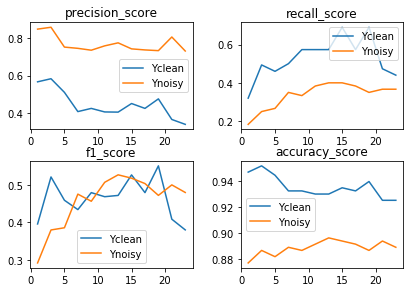

In [19]:
fig,axs = plt.subplots(nrows=2,ncols=2)
fig.tight_layout()
axs = axs.ravel()
for it,m in enumerate(SCORERS):
    axs[it].plot(pars[HYP],clean[m],label='Yclean');
    axs[it].plot(pars[HYP],noisy[m],label='Ynoisy');
    axs[it].set_title(m.__name__)
    axs[it].legend();

In [ ]:
grid = grid.fit(X,y)
Ks = [d[HYP] for d in grid.cv_results_['params']]
vals = grid.cv_results_['mean_test_score']
print(grid.best_params_)
plt.xticks(Ks)
plt.plot(Ks,vals );

In [ ]:
clf.set_params(**grid.best_params_)
cross_val_score(clf,X,y,cv=CV).mean()

In [ ]:
grid = grid.fit(X,yn)
Ks = [d[HYP] for d in grid.cv_results_['params']]
vals = grid.cv_results_['mean_test_score']
print(grid.best_params_)
plt.xticks(Ks)
plt.plot(Ks,vals);

In [ ]:
clf.set_params(**grid.best_params_)
cross_val_score(clf,X,y,cv=CV).mean()